In [1]:
#predicting price of the house with Regression
import pandas as pd
url = 'C:/Users/Ahmadi/OneDrive/Desktop/datasets/2.1 kc_house_data.csv'
df = pd.read_csv(url).fillna(0)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built
0,221900,3,1,1180,5650,1,3,7,1180,1955
1,538000,3,2,2570,7242,2,3,7,2170,1951
2,180000,2,1,770,10000,1,3,6,770,1933
3,604000,4,3,1960,5000,1,5,7,1050,1965
4,510000,3,2,1680,8080,1,3,8,1680,1987
...,...,...,...,...,...,...,...,...,...,...
4994,637000,4,3,2900,5803,2,3,9,2900,2007
4995,692500,3,2,3420,9900,1,3,9,1710,1963
4996,322400,3,2,1710,15844,1,4,8,1710,1964
4997,233500,3,2,1580,10517,1,4,6,1580,1957


In [2]:
from sklearn.model_selection import train_test_split

x = df.iloc[:,1:10].values
print(x)
y = df.iloc[:,0].values

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

[[   3    1 1180 ...    7 1180 1955]
 [   3    2 2570 ...    7 2170 1951]
 [   2    1  770 ...    6  770 1933]
 ...
 [   3    2 1710 ...    8 1710 1964]
 [   3    2 1580 ...    6 1580 1957]
 [   3    2 1230 ...    7  990 1984]]


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

regr = LinearRegression()
regr.fit(xtrain,ytrain)
ypred = regr.predict(xtest)

r2score = r2_score(ytest,ypred)
mae = mean_absolute_error(y_true=ytest,y_pred=ypred)
mse = mean_squared_error(y_true=ytest,y_pred=ypred)
rmse = mean_squared_error(y_true=ytest,y_pred=ypred)
print('R-squared score:',r2score)
print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)


R-squared score: 0.588137439512843
MAE: 156643.64197360296
MSE: 63805647090.22043
RMSE: 63805647090.22043


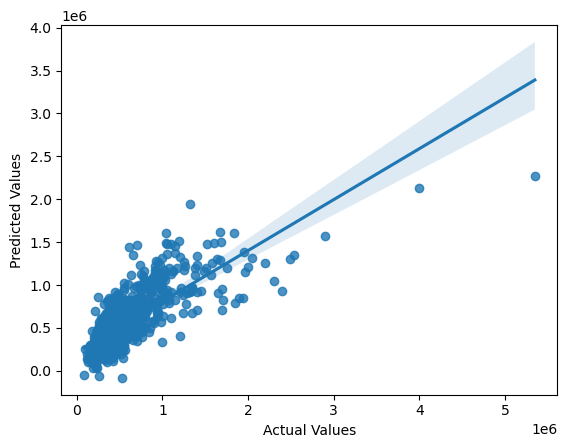

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
#create scatterplot with regression line
fig = sns.regplot(x=ytest,y=ypred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show(fig)

In [8]:
#creating a testing record for prediction
bedrooms = input('Enter the No of bedrooms:')
bathrooms = input('Enter the No of bathrooms:')
sq_ft_living = input('Enter square feet living area:')
sq_ft_total = input('Enter square feet total area:')
floors = input('Enter the floors(1 or 2):')
condition = input('Enter the condition(1 to 10):')
grade = input('Enter the grade(1 to 15):')
sq_ft_above = input('Enter the square feet area above:')
yr_built = input('Enter the year of built:')

data1 = {
         'bedrooms':[bedrooms],
         'bathrooms':[bathrooms],
         'sqft_living':[sq_ft_living],
         'sqft_total':[sq_ft_total],
         'floors':[floors],
         'condition':[condition],
         'grade':[grade],
         'sqft_above':[sq_ft_above],
         'yr_built':[yr_built]
}
data = pd.DataFrame(data1)
data

Enter the No of bedrooms: 2
Enter the No of bathrooms: 3
Enter square feet living area: 25000
Enter square feet total area: 200000
Enter the floors(1 or 2): 1
Enter the condition(1 to 10): 4
Enter the grade(1 to 15): 2
Enter the square feet area above: 78000
Enter the year of built: 2022


,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,sqft_above,yr_built
0,2,3,25000,200000,1,4,2,78000,2022


In [9]:
#predicting the price of the testing record
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(xtrain,ytrain)
ypred = regr.predict(data)
print('The price of the house predicted is:',ypred[0])

The price of the house predicted is: 4400484.795033702


C:\Users\Ahmadi\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
